
# Кейс спринта


Заказчик проекта — «Карта ДТП». Это некоммерческий проект, посвящённый проблеме дорожно-транспортных происшествий в России. Цель проекта — повысить безопасность на дорогах.

«Карта ДТП» помогает выявлять реальные причины ДТП, оценивать уровень развития инфраструктуры, а также разрабатывать качественные решения и программы по повышению безопасности на улицах и дорогах. Заказчик хочет собирать данные более высокого качества и ожидает от вас рекомендаций: на какие проблемы или особенности обратить внимание.

## Что нужно сделать

Вам необходимо проверить, встречаются ли в данных дубликаты и пропуски. Это поможет заказчикам собирать более качественные данные.

Вам также понадобится ответить на следующие вопросы:

- как менялось число ДТП по временным промежуткам;

- различается ли число ДТП для групп водителей с разным стажем.


## Описание данных

Данные `Kirovskaya_oblast.csv`, `Moscowskaya_oblast.csv` содержат информацию ДТП:

* `geometry.coordinates` — координаты ДТП;

* `id` — идентификатор ДТП;

*  `properties.tags` — тег происшествия;

*  `properties.light` — освещённость;

*  `properties.point.lat` — широта;

*  `properties.point.long` — долгота;

*  `properties.nearby` — ближайшие объекты;

*  `properties.region` — регион;

*  `properties.scheme` — схема ДТП;

*  `properties.address` — ближайший адрес;

*  `properties.weather` — погода;

*  `properties.category` — категория ДТП;

*  `properties.datetime` — дата и время ДТП;

*  `properties.injured_count` — число пострадавших;

*  `properties.parent_region` — область;

*  `properties.road_conditions` — состояние покрытия;

*  `properties.participants_count` — число участников;

*  `properties.participant_categories` — категории участников.

`Moscowskaya_oblast_participiants.csv`, `Kirovskaya_oblast_participiants.csv` — сведения об участниках ДТП:

* `role` — роль;

* `gender` — пол;

* `violations` — какие правила дорожного движения были нарушены конкретным участником;

* `health_status` — состояние здоровья после  ДТП;

* `years_of_driving_experience` — число лет опыта;

* `id` — идентификатор ДТП.


`Kirovskaya_oblast_vehicles.csv`, `Moscowskaya_oblast_vehicles.csv` — сведения о транспортных средствах:

* `year` — год выпуска;

* `brand` — марка транспортного средства;

* `color` — цвет;

* `model` — модель;

* `category` — категория;

* `id` — идентификатор ДТП.

## Проверка ошибок в данных и их предобработка

### Замена названий (меток) столбцов на оптимальные для работы

In [104]:
import pandas as pd

In [105]:
ko = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast.csv')
display(ko.info())
mo = pd.read_csv('https://code.s3.yandex.net/datasets/Moscowskaya_oblast.csv')
display(mo.info())
ko_part = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast_participiants.csv')
display(ko_part.info())
mo_part = pd.read_csv('https://code.s3.yandex.net/datasets/Moscowskaya_oblast_participiants.csv')
display(mo_part.info())
ko_v = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast_vehicles.csv')
display(ko_v.info())
mo_v = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast_vehicles.csv')
display(mo_v.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   geometry.coordinates               14517 non-null  object 
 1   id                                 14517 non-null  int64  
 2   properties.tags                    14517 non-null  object 
 3   properties.light                   14517 non-null  object 
 4   properties.point.lat               14485 non-null  float64
 5   properties.point.long              14485 non-null  float64
 6   properties.nearby                  14517 non-null  object 
 7   properties.region                  14517 non-null  object 
 8   properties.scheme                  13380 non-null  float64
 9   properties.address                 13843 non-null  object 
 10  properties.weather                 14517 non-null  object 
 11  properties.category                14517 non-null  obj

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45618 entries, 0 to 45617
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   geometry.coordinates               45618 non-null  object 
 1   id                                 45618 non-null  int64  
 2   properties.tags                    45618 non-null  object 
 3   properties.light                   45618 non-null  object 
 4   properties.point.lat               45615 non-null  float64
 5   properties.point.long              45615 non-null  float64
 6   properties.nearby                  45618 non-null  object 
 7   properties.region                  45618 non-null  object 
 8   properties.scheme                  44235 non-null  float64
 9   properties.address                 43862 non-null  object 
 10  properties.weather                 45618 non-null  object 
 11  properties.category                45618 non-null  obj

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31235 entries, 0 to 31234
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         31235 non-null  object 
 1   gender                       30387 non-null  object 
 2   violations                   31235 non-null  object 
 3   health_status                31135 non-null  object 
 4   years_of_driving_experience  16909 non-null  float64
 5   id                           31235 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95177 entries, 0 to 95176
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         95177 non-null  object 
 1   gender                       93307 non-null  object 
 2   violations                   95177 non-null  object 
 3   health_status                95070 non-null  object 
 4   years_of_driving_experience  59679 non-null  float64
 5   id                           95177 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 4.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20093 entries, 0 to 20092
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      19299 non-null  float64
 1   brand     19318 non-null  object 
 2   color     19643 non-null  object 
 3   model     19318 non-null  object 
 4   category  20093 non-null  object 
 5   id        20093 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 942.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20093 entries, 0 to 20092
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      19299 non-null  float64
 1   brand     19318 non-null  object 
 2   color     19643 non-null  object 
 3   model     19318 non-null  object 
 4   category  20093 non-null  object 
 5   id        20093 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 942.0+ KB


None

В таблицах Kirovskaya_oblast.csv и Moscowskaya_oblast.csv (ko, mo) необходимо привести названия столбцов к snake_case. Кроме того, можно сократить названия столбцов, в которых есть слово properties.

In [106]:
ko.columns = ko.columns.str.replace('.', '_').str.replace('properties_','')
display(ko.info())
mo.columns = mo.columns.str.replace('.', '_').str.replace('properties_','')
display(mo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   geometry_coordinates    14517 non-null  object 
 1   id                      14517 non-null  int64  
 2   tags                    14517 non-null  object 
 3   light                   14517 non-null  object 
 4   point_lat               14485 non-null  float64
 5   point_long              14485 non-null  float64
 6   nearby                  14517 non-null  object 
 7   region                  14517 non-null  object 
 8   scheme                  13380 non-null  float64
 9   address                 13843 non-null  object 
 10  weather                 14517 non-null  object 
 11  category                14517 non-null  object 
 12  datetime                14517 non-null  object 
 13  injured_count           14517 non-null  int64  
 14  parent_region           14517 non-null

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45618 entries, 0 to 45617
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   geometry_coordinates    45618 non-null  object 
 1   id                      45618 non-null  int64  
 2   tags                    45618 non-null  object 
 3   light                   45618 non-null  object 
 4   point_lat               45615 non-null  float64
 5   point_long              45615 non-null  float64
 6   nearby                  45618 non-null  object 
 7   region                  45618 non-null  object 
 8   scheme                  44235 non-null  float64
 9   address                 43862 non-null  object 
 10  weather                 45618 non-null  object 
 11  category                45618 non-null  object 
 12  datetime                45618 non-null  object 
 13  injured_count           45618 non-null  int64  
 14  parent_region           45618 non-null

None

Приведём столбцы datetime к соответствующему типу.

In [107]:
ko['datetime']=ko['datetime'].astype('datetime64[ns]')
display(ko['datetime'].head(2))

0   2017-07-01 18:00:00
1   2023-09-12 17:10:00
Name: datetime, dtype: datetime64[ns]

In [108]:
mo['datetime']=mo['datetime'].astype('datetime64[ns]')
display(ko['datetime'].head(2))

0   2017-07-01 18:00:00
1   2023-09-12 17:10:00
Name: datetime, dtype: datetime64[ns]

### Проверка пропусков в данных

На примере датасета `Kirovskaya_oblast.csv` изучите, в каких столбцах есть пропуски. Предположите причины их возникновения. Напишите рекомендации, как работать с  пропусками и как их в дальнейшем избежать.

In [109]:
display(ko.head())
display(ko.isna().sum())
display(round(ko.isna().sum()*100/ko.shape[0], 2))

,geometry_coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.243790,47.875603,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,['Дождь'],Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники']
1,"[47.87903, 57.304807]",2889433,Дорожно-транспортные происшествия,Светлое время суток,57.304807,47.879030,"['Административные здания', 'Нерегулируемый пе...",Яранский район,710.0,"г Яранск, ул Кирова, 10",['Ясно'],Наезд на пешехода,2023-09-12 17:10:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']"
2,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297156,47.840781,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,NaN,"г Яранск, ул Чапаева, 80",['Пасмурно'],Съезд с дороги,2021-07-02 21:25:00,1,Кировская область,['Мокрое'],1,['Все участники']
3,"[47.834365, 57.244775]",2577639,Дорожно-транспортные происшествия,Светлое время суток,57.244775,47.834365,['Жилые дома индивидуальной застройки'],Яранский район,200.0,"м Знаменка, ул Кирова, 15",['Пасмурно'],Столкновение,2021-05-31 18:55:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']"
4,"[47.968197, 57.357738]",1981026,Дорожно-транспортные происшествия,Светлое время суток,57.357738,47.968197,['Нерегулируемый перекрёсток неравнозначных ул...,Яранский район,NaN,"с/п Никольское, Киров-Советск- Яранск - подъез...",['Ясно'],Опрокидывание,2018-05-16 16:25:00,2,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники']


geometry_coordinates         0
id                           0
tags                         0
light                        0
point_lat                   32
point_long                  32
nearby                       0
region                       0
scheme                    1137
address                    674
weather                      0
category                     0
datetime                     0
injured_count                0
parent_region                0
road_conditions              0
participants_count           0
participant_categories       0
dtype: int64

geometry_coordinates      0.00
id                        0.00
tags                      0.00
light                     0.00
point_lat                 0.22
point_long                0.22
nearby                    0.00
region                    0.00
scheme                    7.83
address                   4.64
weather                   0.00
category                  0.00
datetime                  0.00
injured_count             0.00
parent_region             0.00
road_conditions           0.00
participants_count        0.00
participant_categories    0.00
dtype: float64

В 32 строках из 14517 отсутствует информация о координатах ДТП, что может быть следствием технических неполадок. Это всего 0.22%, кроме того, данные о координатах могут не использоваться в дальнейшем в агрегирующих функциях, так что этими пропусками можно пренебречь.

Пропуски в схемах ДТП составляют почти 8%. Возможно, они возникли вследствие человеческого фактора или невозможности определить конкретную схему ДТП (судя по всему, данные в этом столбце представляют собой некие ссылки на стандартные схемы). Эти данные также вряд ли будут использоваться в агрегирующих функциях, поэтому и на эти пропуски можно закрыть глаза и ничего с ними не делать.

Пропуски в графе с адресом составляют почти 5%. Они могут быть связаны с невозможностью определить конкретный адрес (например, на загородных трассах) или опять же с человеческим фактором. Эти данные также можно не трогать.

Если же стоит задача максимально очистить данные, можно удалить строки с отсутствующими координатами, однако схемы и адреса трогать не стоит - слишком большой процент пропусков.

### Наличие явных и неявных дубликатов в данных

Есть ли явные дубликаты в данных, какой это процент значений?

In [110]:
display(round(ko.duplicated().sum()*100/ko.shape[0], 2))
display(round(100*mo.duplicated().sum()/mo.shape[0], 2))
display(round(100*ko_part.duplicated().sum()/ko_part.shape[0], 2))
display(round(100*mo_part.duplicated().sum()/mo_part.shape[0], 2))
display(round(100*ko_v.duplicated().sum()/ko_v.shape[0], 2))
display(round(100*mo_v.duplicated().sum()/mo_v.shape[0], 2))

np.float64(0.0)

np.float64(0.0)

np.float64(31.14)

np.float64(37.22)

np.float64(0.09)

np.float64(0.09)

Процент явных дубликатов в таблицах с участниками ДТП довольно высок (31-37%)- вероятно, появлялись повторные записи при повторных ДТП. Их можно удалить.

Также 0.09% полностью повторяющихся записей есть в таблицах с данными о транспортных средствах. Их тем более можно удалить.

In [111]:
ko_part = ko_part.drop_duplicates(keep='first', inplace=False, ignore_index=True)
display(ko_part.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21508 entries, 0 to 21507
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         21508 non-null  object 
 1   gender                       20951 non-null  object 
 2   violations                   21508 non-null  object 
 3   health_status                21443 non-null  object 
 4   years_of_driving_experience  11144 non-null  float64
 5   id                           21508 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1008.3+ KB


None

In [112]:
mo_part = mo_part.drop_duplicates(keep='first', inplace=False, ignore_index=True)
display(mo_part.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59749 entries, 0 to 59748
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         59749 non-null  object 
 1   gender                       58563 non-null  object 
 2   violations                   59749 non-null  object 
 3   health_status                59689 non-null  object 
 4   years_of_driving_experience  35151 non-null  float64
 5   id                           59749 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 2.7+ MB


None

In [113]:
ko_v = ko_v.drop_duplicates(keep='first', inplace=False, ignore_index=True)
display(ko_v.info())
display(ko_v.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20075 entries, 0 to 20074
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      19291 non-null  float64
 1   brand     19310 non-null  object 
 2   color     19632 non-null  object 
 3   model     19310 non-null  object 
 4   category  20075 non-null  object 
 5   id        20075 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 941.1+ KB


None

,year,brand,color,model,category,id
0,2011.0,ВАЗ,Серый,Kalina,"А-класс (особо малый) до 3,5 м",1983180
1,2005.0,CHEVROLET,Зеленый,Niva,"С-класс (малый средний, компактный) до 4,3 м",2889433
2,2017.0,RENAULT,Синий,Logan,"С-класс (малый средний, компактный) до 4,3 м",2591208
3,2006.0,ВАЗ,Зеленый,ВАЗ 2115 и модификации,"С-класс (малый средний, компактный) до 4,3 м",2577639
4,1986.0,MERCEDES,Зеленый,Прочие модели Mercedes,Фургоны,1981026


In [114]:
mo_v = mo_v.drop_duplicates(keep='first', inplace=False, ignore_index=True)
display(mo_v.info())
display(mo_v.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20075 entries, 0 to 20074
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      19291 non-null  float64
 1   brand     19310 non-null  object 
 2   color     19632 non-null  object 
 3   model     19310 non-null  object 
 4   category  20075 non-null  object 
 5   id        20075 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 941.1+ KB


None

,year,brand,color,model,category,id
0,2011.0,ВАЗ,Серый,Kalina,"А-класс (особо малый) до 3,5 м",1983180
1,2005.0,CHEVROLET,Зеленый,Niva,"С-класс (малый средний, компактный) до 4,3 м",2889433
2,2017.0,RENAULT,Синий,Logan,"С-класс (малый средний, компактный) до 4,3 м",2591208
3,2006.0,ВАЗ,Зеленый,ВАЗ 2115 и модификации,"С-класс (малый средний, компактный) до 4,3 м",2577639
4,1986.0,MERCEDES,Зеленый,Прочие модели Mercedes,Фургоны,1981026


Вообще, судя по одинаковому количеству записей в таблицах с транспортнымии средствами, участвовавшими в ДТП в Кировской и в Московской области, мможно предположить, что данные в этих таблицах дублируются.

In [115]:
ko_v['id'].compare(mo_v['id'], keep_shape=True, keep_equal=True)

,self,other
0,1983180,1983180
1,2889433,2889433
2,2591208,2591208
3,2577639,2577639
4,1981026,1981026
...,...,...
20070,2693288,2693288
20071,2649405,2649405
20072,1985567,1985567
20073,1984910,1984910


In [116]:
dif = ko_v['id'] - mo_v['id']
display(dif.isna().sum())

np.int64(0)

Таким образом мы получили, что можно использовать только одну таблицу с данными о транспортных средствах.

### Проверка корректности типов данных

Столбцы с датами мы уже привели к нужному типу. Разберёмся с числовыми столбцами.

In [117]:
display(ko.head())

display(mo.head())

display(ko_part.head())

display(mo_part.head())

display(ko_v.head())

,geometry_coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.243790,47.875603,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,['Дождь'],Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники']
1,"[47.87903, 57.304807]",2889433,Дорожно-транспортные происшествия,Светлое время суток,57.304807,47.879030,"['Административные здания', 'Нерегулируемый пе...",Яранский район,710.0,"г Яранск, ул Кирова, 10",['Ясно'],Наезд на пешехода,2023-09-12 17:10:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']"
2,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297156,47.840781,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,NaN,"г Яранск, ул Чапаева, 80",['Пасмурно'],Съезд с дороги,2021-07-02 21:25:00,1,Кировская область,['Мокрое'],1,['Все участники']
3,"[47.834365, 57.244775]",2577639,Дорожно-транспортные происшествия,Светлое время суток,57.244775,47.834365,['Жилые дома индивидуальной застройки'],Яранский район,200.0,"м Знаменка, ул Кирова, 15",['Пасмурно'],Столкновение,2021-05-31 18:55:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']"
4,"[47.968197, 57.357738]",1981026,Дорожно-транспортные происшествия,Светлое время суток,57.357738,47.968197,['Нерегулируемый перекрёсток неравнозначных ул...,Яранский район,NaN,"с/п Никольское, Киров-Советск- Яранск - подъез...",['Ясно'],Опрокидывание,2018-05-16 16:25:00,2,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники']


,geometry_coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,"[37.5253, 55.9992]",2163589,['Дорожно-транспортные происшествия'],Светлое время суток,55.999200,37.525300,"['Мост, эстакада, путепровод', 'Крупный торгов...",Мытищинский,NaN,"ХЛЕБНИКОВО-РОГАЧЕВО, 0 км",['Ясно'],Столкновение,2019-01-31 09:05:00,1,Московская область,"['Мокрое', 'Отсутствие, плохая различимость го...",3,['Все участники']
1,"[37.058966, 55.788688]",2155398,"['Дорожно-транспортные происшествия', 'ДТП и п...","В темное время суток, освещение включено",55.788688,37.058966,[],Истринский,70.0,М-9 Балтия Москва - Волоколамск - граница с Ла...,['Ясно'],Столкновение,2018-09-22 05:00:00,2,Московская область,['Сухое'],4,"['Все участники', 'Дети']"
2,"[37.4419, 56.0081]",2163319,['Дорожно-транспортные происшествия'],"В темное время суток, освещение включено",56.008100,37.441900,"['Многоквартирные жилые дома', 'Остановка обще...",Лобня,820.0,"г Лобня, ул Ленина, 43",['Пасмурно'],Наезд на пешехода,2019-01-24 19:30:00,1,Московская область,['Обработанное противогололедными материалами'],2,"['Все участники', 'Пешеходы']"
3,"[38.6614, 55.4358]",2143938,['Дорожно-транспортные происшествия'],Светлое время суток,55.435800,38.661400,['Регулируемый перекресток'],Воскресенский,300.0,ЖУКОВСКИЙ-РАМЕНСКОЕ-СТ.БРОННИЦЫ-ЧЕЧЕВИЛОВО-МБК...,['Ясно'],Столкновение,2018-01-25 16:00:00,2,Московская область,['Обработанное противогололедными материалами'...,3,['Все участники']
4,"[38.29207, 55.50502]",2163390,['Дорожно-транспортные происшествия'],"В темное время суток, освещение отсутствует",55.505020,38.292070,['Нерегулируемый перекрёсток неравнозначных ул...,Раменский,500.0,"ММК-РАМЕНСКОЕ, 4 км",['Ясно'],Столкновение,2019-01-14 17:40:00,1,Московская область,['Обработанное противогололедными материалами'],2,['Все участники']


,role,gender,violations,health_status,years_of_driving_experience,id
0,Водитель,Мужской,['Несоответствие скорости конкретным условиям ...,"Раненый, находящийся (находившийся) на амбулат...",26.0,1983180
1,Водитель,Мужской,[],Не пострадал,34.0,2889433
2,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
3,Водитель,Мужской,[],Не пострадал,27.0,2577639
4,Пассажир,Женский,[],"Раненый, находящийся (находившийся) на стацион...",NaN,1981026


,role,gender,violations,health_status,years_of_driving_experience,id
0,Водитель,Мужской,[],Не пострадал,13.0,2163589
1,Водитель,Мужской,['Неправильный выбор дистанции'],Не пострадал,5.0,2155398
2,Водитель,Женский,[],Не пострадал,11.0,2163319
3,Водитель,Мужской,['Несоблюдение очередности проезда перекрестков'],Не пострадал,23.0,2143938
4,Водитель,Мужской,[],Не пострадал,19.0,2163390


,year,brand,color,model,category,id
0,2011.0,ВАЗ,Серый,Kalina,"А-класс (особо малый) до 3,5 м",1983180
1,2005.0,CHEVROLET,Зеленый,Niva,"С-класс (малый средний, компактный) до 4,3 м",2889433
2,2017.0,RENAULT,Синий,Logan,"С-класс (малый средний, компактный) до 4,3 м",2591208
3,2006.0,ВАЗ,Зеленый,ВАЗ 2115 и модификации,"С-класс (малый средний, компактный) до 4,3 м",2577639
4,1986.0,MERCEDES,Зеленый,Прочие модели Mercedes,Фургоны,1981026


Привести столбцы тип float с пропусками к типу int не получится, поскольку значение NaN - типа float. Однако можно заменить NaN на 0 и привести столбцы к целочисленному типу. Но, пожалуй, этим не стоит заниматься, лучше сохранить пропуски.

## Исследовательский анализ



### Какое число ДТП случилось в каждый день недели. Разбивка числа происшествий по месяцам

In [118]:
ko['day'] = ko['datetime'].dt.weekday+1
#display(ko.head())
mo['day'] = mo['datetime'].dt.weekday+1

In [119]:
ko_days = ko.groupby(by = 'day').agg({'id': 'count'}).reset_index()
display(ko_days.sort_values('id', ascending = False))

,day,id
4,5,2344
5,6,2246
6,7,2054
0,1,2010
1,2,1988
2,3,1939
3,4,1936


In [120]:
mo_days = mo.groupby(by = 'day').agg({'id': 'count'}).reset_index()
display(mo_days.sort_values('id', ascending = False))

,day,id
5,6,7285
4,5,7024
0,1,6390
3,4,6343
6,7,6318
1,2,6156
2,3,6102


Наибольшее количество ДТП в обеих областях происходит в четверг и пятницу. В понедельник и вторник (и в среду в Кировской области) это значение минимально.

In [121]:
ko['mnth'] = ko['datetime'].dt.month
#display(ko.head())
mo['mnth'] = mo['datetime'].dt.month

In [122]:
ko_mnth = ko.groupby(by = 'mnth').agg({'id': 'count'}).reset_index()
display(ko_mnth.sort_values('id', ascending = False))

,mnth,id
7,8,1654
6,7,1635
5,6,1421
8,9,1370
9,10,1333
10,11,1200
4,5,1189
11,12,1164
0,1,1069
3,4,875


In [123]:
mo_mnth = mo.groupby(by = 'mnth').agg({'id': 'count'}).reset_index()
display(mo_mnth.sort_values('id', ascending = False))

,mnth,id
7,8,4787
8,9,4571
6,7,4401
5,6,4354
9,10,4113
4,5,3992
11,12,3732
10,11,3618
0,1,3254
3,4,3172


Наибольшее количество ДТП в обеих областях приходится на июль. Наименьшее - на январь и февраль.

### Категории водителей по стажу. Встречаются ли категории, которые разительно отличаются по числу ДТП

In [124]:
ko_min_exp = ko_part['years_of_driving_experience'].min()
print(f'Минимальный стаж (Кировская область): {ko_min_exp} лет.')
mo_min_exp = mo_part['years_of_driving_experience'].min()
print(f'Минимальный стаж (Московская область): {ko_min_exp} лет.')

Минимальный стаж (Кировская область): 1.0 лет.
Минимальный стаж (Московская область): 1.0 лет.


In [125]:
ko_max_exp = ko_part['years_of_driving_experience'].max()
print(f'Максимальный стаж (Кировская область): {ko_max_exp} лет.')
mo_max_exp = mo_part['years_of_driving_experience'].max()
print(f'Максимальный стаж (Московская область): {ko_max_exp} лет.')

Максимальный стаж (Кировская область): 66.0 лет.
Максимальный стаж (Московская область): 66.0 лет.


In [126]:
ko_part['exp_group'] = pd.cut(ko_part['years_of_driving_experience'], bins=[1, 10, 20, 30, 40, 50, 60, 100],
                              labels=["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", ">60"])
#display(ko_part.head(2))
ko_part_gr = ko_part.groupby('exp_group', observed=True).agg({'id': 'count'}).reset_index()
ko_part_gr['fraction (%)'] = round(ko_part_gr['id']*100/ko_part.shape[0], 2)
display(ko_part_gr)

,exp_group,id,fraction (%)
0,0-10,3958,18.40
1,11-20,3312,15.40
2,21-30,1807,8.40
3,31-40,1062,4.94
4,41-50,411,1.91
5,51-60,68,0.32
6,>60,6,0.03


In [127]:
mo_part['exp_group'] = pd.cut(mo_part['years_of_driving_experience'], bins=[1, 10, 20, 30, 40, 50, 60, 100],
                              labels=["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", ">60"])
#display(mo_part.head(2))
mo_part_gr = mo_part.groupby('exp_group', observed=True).agg({'id': 'count'}).reset_index()
mo_part_gr['fraction (%)'] = round(mo_part_gr['id']*100/mo_part.shape[0], 2)
display(mo_part_gr)

,exp_group,id,fraction (%)
0,0-10,12374,20.71
1,11-20,11265,18.85
2,21-30,5947,9.95
3,31-40,2795,4.68
4,41-50,952,1.59
5,51-60,214,0.36
6,>60,28,0.05


Итак, максимальное количество ДТП приходится на группу со стажем от 1 до 10 лет, дальше процент совершённых ДТП уменьшается. Возможно, это отчасти связано с тем, что людей с бОльшим стажем просто меньше по популяции (обратим внимание, что мы вычисляем **процент от совершённых ДТП**, а не **процент водителей определённой группы, попавших в ДТП, от всего количества водителей в этой группе**, так что, на мой взгляд, полученные результаты сложно верно интерпретировать).

### Как менялось число аварий в Кировской (Киров входит в численность) и Московской области (Москва исключена). Где аварий больше в относительном выражении — в пересчёте на 100 тысяч жителей

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

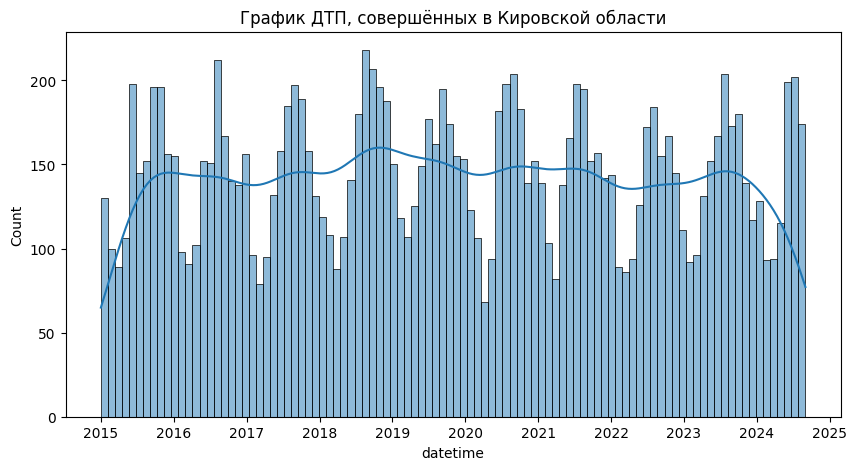

In [129]:
plt.figure(figsize=(10, 5))
sns.histplot(ko['datetime'], bins=100, kde=True)
plt.title('График ДТП, совершённых в Кировской области')
plt.show()

Пожалуй, говорить о снижении числа ДТП в Кировской области с 2015 по 2024 год нельзя.

Проверим даты начала и окончания регистрации ДТП.

In [130]:
print(f'Начало регистрации: {ko['datetime'].min()}.')
print(f'Окончание регистрации: {ko['datetime'].max()}.')

Начало регистрации: 2015-01-01 03:45:00.
Окончание регистрации: 2024-08-31 18:43:00.


In [131]:
display(mo['region'].unique())
display(mo['parent_region'].unique())

array(['Мытищинский', 'Истринский', 'Лобня', 'Воскресенский', 'Раменский',
       'Рузский', 'Пушкинский', 'Подольский', 'Ленинский', 'Электросталь',
       'Наро-Фоминский', 'Павлово-Посадский', 'Королёв', 'Щелковский',
       'Дубна', 'Долгопрудный', 'Дзержинский', 'Бронницы',
       'Красногорский', 'Ступинский', 'Ногинский', 'Каширский',
       'Серпуховский', 'Одинцовский', 'Солнечногорский',
       'Сергиево-Посадский', 'Чеховский', 'Протвино', 'Люберецкий',
       'Лотошинский', 'Коломенский', 'Можайский', 'Балашиха',
       'Дмитровский', 'Клинский', 'Орехово-Зуево', 'Железнодорожный',
       'Луховицкий', 'Талдомский', 'Домодедово', 'Орехово-Зуевский',
       'Волоколамский', 'Лосино-Петровский', 'Звенигород', 'Жуковский',
       'Коломна', 'Реутов', 'Красноармейск', 'Шатурский', 'Химки',
       'Серпухов', 'Лыткарино', 'Фрязино', 'Котельники', 'Климовск',
       'Ивантеевка', 'Егорьевский', 'Власиха', 'Зарайский', 'Озёрский',
       'Серебряно-Прудский', 'Рошаль', 'Шаховской'

array(['Московская область'], dtype=object)

Мы видим, что Москвы нет в списке регионов, поэтому можем взять просто всю таблицу.

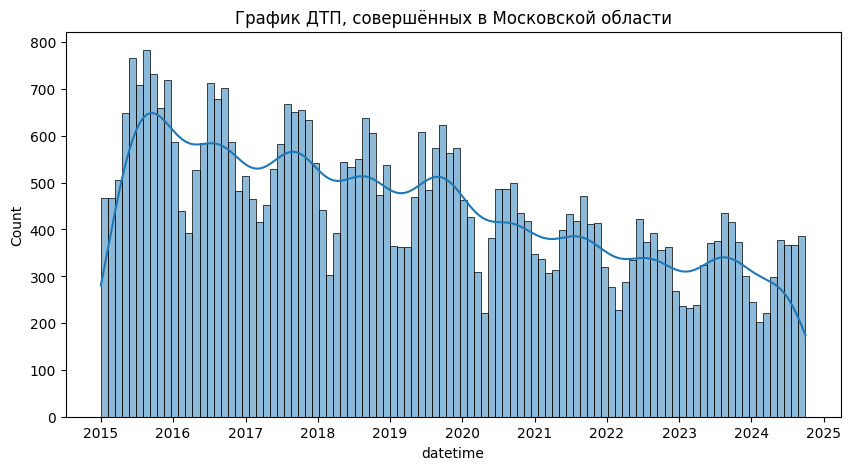

In [132]:
plt.figure(figsize=(10, 5))
sns.histplot(mo['datetime'], bins=100, kde=True)
plt.title('График ДТП, совершённых в Московской области')
plt.show()

Мы видим снижение абсолютного числа ДТП в Московской области в период с 2016 по 2023 год (поскольку 2015 и 2024, вероятно, учтены не полностью). Кстати, выясним даты начала и окончания регистрации ДТП в данной таблице.

In [133]:
print(f'Начало регистрации: {mo['datetime'].min()}.')

Начало регистрации: 2015-01-01 00:20:00.


In [134]:
print(f'Окончание регистрации: {mo['datetime'].max()}.')

Окончание регистрации: 2024-09-30 18:20:00.


Первое ДТП зарегистрировано 01.01.2015, значит, можем говорить о снижении  с 2015 по 2023 год.

Пересчитаем данные по областям на 100.000 жителей.

Для этого возьмём данные из открытых источников (Wikipedia) с 2015 по 2024 год.

In [135]:
ko['year'] = ko['datetime'].dt.year
mo['year'] = mo['datetime'].dt.year

In [136]:
ko_gry = ko.groupby(['year']).agg({'id':'count'}).reset_index()
#ko_gry['id'] = ko_gry['id']/ko_gry['
display(ko_gry)

,year,id
0,2015,1532
1,2016,1468
2,2017,1452
3,2018,1612
4,2019,1568
5,2020,1498
6,2021,1524
7,2022,1386
8,2023,1486
9,2024,991


In [137]:
mo_gry = mo.groupby(['year']).agg({'id':'count'}).reset_index()
display(mo_gry)

,year,id
0,2015,6643
1,2016,5794
2,2017,5747
3,2018,5102
4,2019,5111
5,2020,4216
6,2021,3898
7,2022,3353
8,2023,3372
9,2024,2382


Московская область:

7231068	7318647	7423470 7503385	7599647	7690863	8524665	8542257	8591736	8651260

Кировская область:

1304348	1297474	1291684	1283238	1272109	1262402	1153680	1149176	1138112 1129935								

Создадим дополнительный столбец в обеих таблицах.

In [138]:
popul=[]

for y in ko_gry['year']:
    if y == 2015:
        popul.append(round(1304348/100000, 2))
    elif y == 2016:
        popul.append(round(1297474/100000, 2))
    elif y == 2017:
        popul.append(round(1291684/100000, 2))
    elif y == 2018:
        popul.append(round(1283238/100000, 2))
    elif y == 2019:
        popul.append(round(1272109/100000, 2))
    elif y == 2020:
        popul.append(round(1262402/100000, 2))
    elif y == 2021:
        popul.append(round(1153680/100000, 2))
    elif y == 2022:
        popul.append(round(1149176/100000, 2))
    elif y == 2023:
        popul.append(round(1138112/100000, 2))
    else:
        popul.append(np.nan)
        
ko_gry['population'] = popul
ko_gry['fract'] = round(ko_gry['id']/ko_gry['population'], 2)
display(ko_gry)

,year,id,population,fract
0,2015,1532,13.04,117.48
1,2016,1468,12.97,113.18
2,2017,1452,12.92,112.38
3,2018,1612,12.83,125.64
4,2019,1568,12.72,123.27
5,2020,1498,12.62,118.70
6,2021,1524,11.54,132.06
7,2022,1386,11.49,120.63
8,2023,1486,11.38,130.58
9,2024,991,NaN,NaN


In [139]:
ko_g = ko_gry[['year', 'fract']]
display(ko_g)

,year,fract
0,2015,117.48
1,2016,113.18
2,2017,112.38
3,2018,125.64
4,2019,123.27
5,2020,118.70
6,2021,132.06
7,2022,120.63
8,2023,130.58
9,2024,NaN


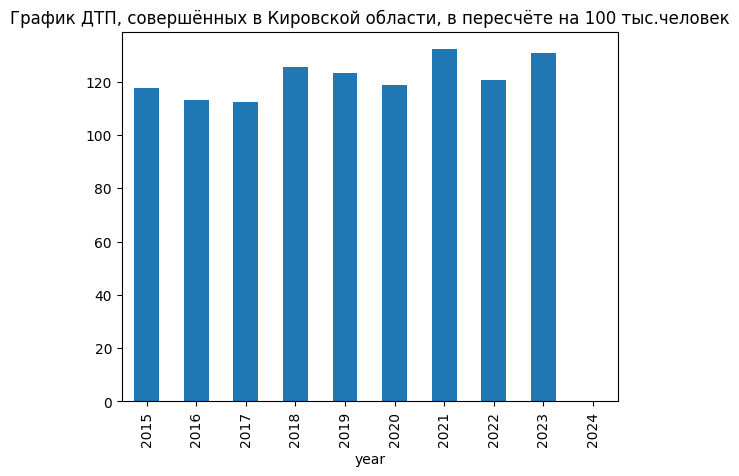

In [140]:
ko_g.plot(kind='bar', x='year', y='fract', legend=False)
plt.title('График ДТП, совершённых в Кировской области, в пересчёте на 100 тыс.человек')
plt.show()

In [141]:
popul=[]

for y in mo_gry['year']:
    if y == 2015:
        popul.append(round(7231068/100000, 2))
    elif y == 2016:
        popul.append(round(7318647/100000, 2))
    elif y == 2017:
        popul.append(round(7423470/100000, 2))
    elif y == 2018:
        popul.append(round(7503385/100000, 2))
    elif y == 2019:
        popul.append(round(7599647/100000, 2))
    elif y == 2020:
        popul.append(round(7690863/100000, 2))
    elif y == 2021:
        popul.append(round(8524665/100000, 2))
    elif y == 2022:
        popul.append(round(8542257/100000, 2))
    elif y == 2023:
        popul.append(round(8591736/100000, 2))
    else:
        popul.append(np.nan)
        
mo_gry['population'] = popul
mo_gry['fract'] = round(mo_gry['id']/mo_gry['population'], 2)

display(mo_gry)

,year,id,population,fract
0,2015,6643,72.31,91.87
1,2016,5794,73.19,79.16
2,2017,5747,74.23,77.42
3,2018,5102,75.03,68.00
4,2019,5111,76.00,67.25
5,2020,4216,76.91,54.82
6,2021,3898,85.25,45.72
7,2022,3353,85.42,39.25
8,2023,3372,85.92,39.25
9,2024,2382,NaN,NaN


In [142]:
mo_g = mo_gry[['year', 'fract']]
display(mo_g)

,year,fract
0,2015,91.87
1,2016,79.16
2,2017,77.42
3,2018,68.00
4,2019,67.25
5,2020,54.82
6,2021,45.72
7,2022,39.25
8,2023,39.25
9,2024,NaN


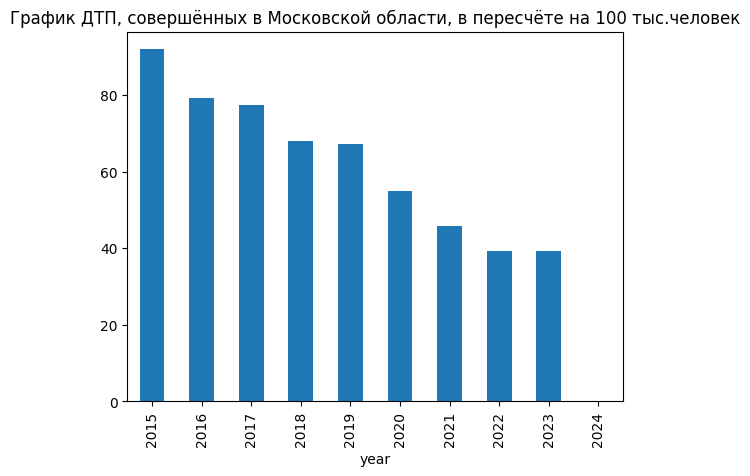

In [143]:
mo_g.plot(kind='bar', x='year', y='fract', legend=False)
plt.title('График ДТП, совершённых в Московской области, в пересчёте на 100 тыс.человек')
plt.show()

Из приведённых графиков видно, что количество ДТП в Московской области уменьшается и в пересчёте на 100.000 населения. Для Кировской области такой динамики нет.

In [144]:
two = ko_g.merge(mo_g, on = 'year', suffixes=('_kir', '_mos'))
display(two)

,year,fract_kir,fract_mos
0,2015,117.48,91.87
1,2016,113.18,79.16
2,2017,112.38,77.42
3,2018,125.64,68.00
4,2019,123.27,67.25
5,2020,118.70,54.82
6,2021,132.06,45.72
7,2022,120.63,39.25
8,2023,130.58,39.25
9,2024,NaN,NaN


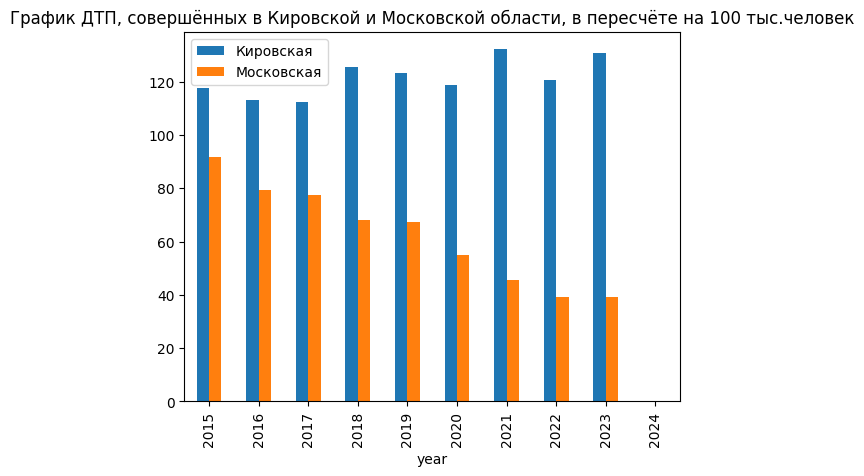

In [145]:
two.plot(kind='bar', x='year', legend=True)
plt.title('График ДТП, совершённых в Кировской и Московской области, в пересчёте на 100 тыс.человек')
plt.legend(['Кировская', 'Московская'])
plt.show()

В Кировской области наблюдается большее число ДТП на 100 тыс.человек, чем в Московской области.

## Итоговые выводы


### Пропуски
Отсутствие данных о координатах ДТП может быть следствием технических неполадок. Это всего 0.22%.

Пропуски в схемах ДТП составляют почти 8%. Возможно, они возникли вследствие человеческого фактора или невозможности определить конкретную схему ДТП.

Пропуски в графе с адресом составляют почти 5%. Они могут быть связаны с невозможностью определить конкретный адрес (например, на загородных трассах) или опять же с человеческим фактором.

### Явные дубликаты

Процент явных дубликатов в таблицах с участниками ДТП довольно высок (31-37%)- вероятно, появлялись повторные записи при повторных ДТП.

Также 0.09% полностью повторяющихся записей есть в таблицах с данными о транспортных средствах.

### ДТП по дням недели

Наибольшее количество ДТП в обеих областях происходит в четверг и пятницу. В понедельник и вторник (и в среду в Кировской области) это значение минимально.

### ДТП по месяцам года

Наибольшее количество ДТП в обеих областях приходится на июль. Наименьшее - на январь и февраль.

### Различия в числе ДТП в категориях водителей с разным стажем

Максимальное количество ДТП приходится на группу со стажем от 1 до 10 лет, дальше процент совершённых ДТП уменьшается. Возможно, это отчасти связано с тем, что людей с бОльшим стажем просто меньше по популяции (обратим внимание, что мы вычисляем **процент от совершённых ДТП**, а не **процент водителей определённой группы, попавших в ДТП, от всего количества водителей в этой группе**, так что, на мой взгляд, полученные результаты сложно верно интерпретировать).

### Динамика числа ДТП по областям с 2015 по 2023 год

В Кировской области изменения числа ДТП не наблюдается ни в абсолютном, ни в относительном (в пересчёте на 100.000 населения) выражении.

Для Московской же области характерно снижение количества ДТП с 2015 по 2023 год и в абсолютном, и в относительном выражении.

При этом в Кировской области наблюдается большее число ДТП на 100 тыс.человек, чем в Московской области.

### Вывод

В Московской области профилактика ДТП явно приводит к положительным результатам. В Кировской области такого не наблюдается.